<a href="https://colab.research.google.com/github/Masarop/Prod-Milho_Brazil_15-17/blob/master/Prod_milho_brasil_2015_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import io,csv
import requests
import matplotlib.pyplot as plt
import numpy
import gzip
import seaborn as sns
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


In [3]:
uploaded = files.upload()


Saving Soybean_2015to2016.csv to Soybean_2015to2016.csv


In [5]:
ds = pd.read_csv('Soybean_2015to2016.csv')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            24 non-null     object 
 1   Area Planted                    24 non-null     float64
 2   Area Harvested                  24 non-null     float64
 3   Yield                           24 non-null     float64
 4   Beginning Stocks                24 non-null     float64
 5   Production                      24 non-null     float64
 6   Imports                         24 non-null     float64
 7   Total Supply                    24 non-null     float64
 8   Crushings                       24 non-null     float64
 9   Exports                         24 non-null     float64
 10  Seed                            24 non-null     float64
 11  Residual                        24 non-null     float64
 12  Total Use                       24 non

In [0]:
ds = ds.drop(['Argentina BeginningStocks', 'Argentina Production','Argentina Imports', 'Argentina DomesticCrush', 'Argentina DomesticTotal','Argentina Exports', 'Argentina EndingStocks', 'China BeginningStocks', 'China Production', 'China Imports','China DomesticCrush','China DomesticTotal','China Exports','China EndingStocks',
              'Japan BeginningStocks','Japan Production', 'Japan Imports','Japan DomesticCrush','Japan DomesticTotal','Japan Exports','Japan EndingStocks', 'Mexico BeginningStocks','Mexico Production','Mexico Imports', 'Mexico DomesticCrush',
              'Mexico DomesticTotal','Mexico Exports','Mexico EndingStocks','European Union BeginningStocks','European Union Production', 'European Union Imports','European Union DomesticCrush', 'European Union DomesticTotal','European Union Exports','European Union EndingStocks','Brazil Imports','Brazil DomesticCrush','Brazil DomesticTotal','Brazil EndingStocks','United States BeginningStocks','United States Production','United States Imports','United States DomesticCrush','United States DomesticTotal',
              'United States Exports','United States EndingStocks','World Imports','World DomesticCrush','World DomesticTotal'], axis=1)

In [0]:
def remove_simbolo_monetario(x):
    a =  x[1:] #remove apenas um caracter
    result = ""
    for i in a:
        if i.isdigit() is True:
            result = result + i
    return result #retorna os digíto, sem o símbolo

In [0]:
ds["Date"] = pd.to_numeric(ds["Date"].apply(remove_simbolo_monetario), errors= "ignore")

In [53]:
ds.info()
print(ds.shape)
ds.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    24 non-null     int64  
 1   Area Planted            24 non-null     float64
 2   Area Harvested          24 non-null     float64
 3   Yield                   24 non-null     float64
 4   Beginning Stocks        24 non-null     float64
 5   Production              24 non-null     float64
 6   Imports                 24 non-null     float64
 7   Total Supply            24 non-null     float64
 8   Crushings               24 non-null     float64
 9   Exports                 24 non-null     float64
 10  Seed                    24 non-null     float64
 11  Residual                24 non-null     float64
 12  Total Use               24 non-null     float64
 13  Ending Stocks           24 non-null     float64
 14  World BeginningStocks   24 non-null     floa

,Date,Area Planted,Area Harvested,Yield,Beginning Stocks,Production,Imports,Total Supply,Crushings,Exports,Seed,Residual,Total Use,Ending Stocks,World BeginningStocks,World Production,World Exports,World EndingStocks,Brazil BeginningStocks,Brazil Production,Brazil Exports
0,150512,84.6,83.7,46.0,350.0,3850.0,30.0,4230.0,1825.0,1775.0,92.0,38.0,3729.0,500.0,85.54,317.30,121.98,96.22,24.93,97.0,49.75
1,150610,84.6,83.7,46.0,330.0,3850.0,30.0,4210.0,1830.0,1775.0,92.0,38.0,3734.0,475.0,83.70,317.58,122.15,93.22,22.75,97.0,49.75
2,150710,85.1,84.4,46.0,255.0,3885.0,30.0,4170.0,1840.0,1775.0,92.0,38.0,3744.0,425.0,81.68,318.92,123.34,91.80,21.60,97.0,50.75
3,150812,84.3,83.5,46.9,240.0,3916.0,30.0,4186.0,1860.0,1725.0,92.0,40.0,3717.0,470.0,80.57,320.05,127.18,86.88,18.32,97.0,54.50
4,150911,84.3,83.5,47.1,210.0,3935.0,30.0,4175.0,1870.0,1725.0,92.0,38.0,3725.0,450.0,78.73,319.61,126.48,84.98,18.17,97.0,54.50


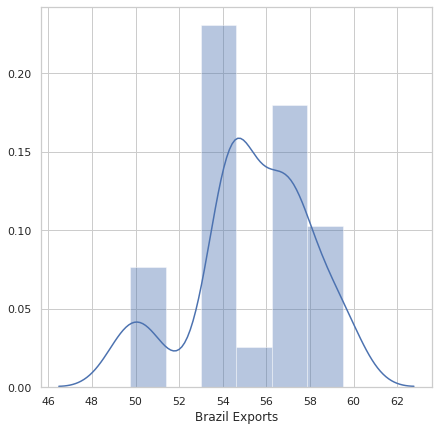

In [19]:
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.distplot(ds["Brazil Exports"])

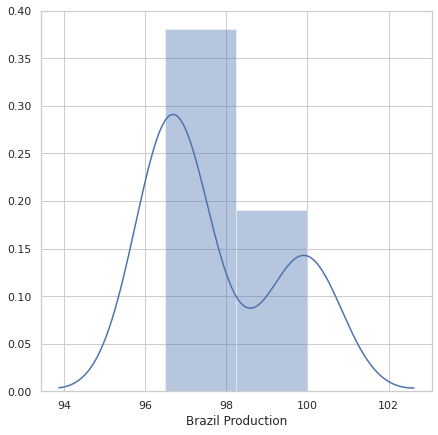

In [13]:
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.distplot(ds["Brazil Production"])

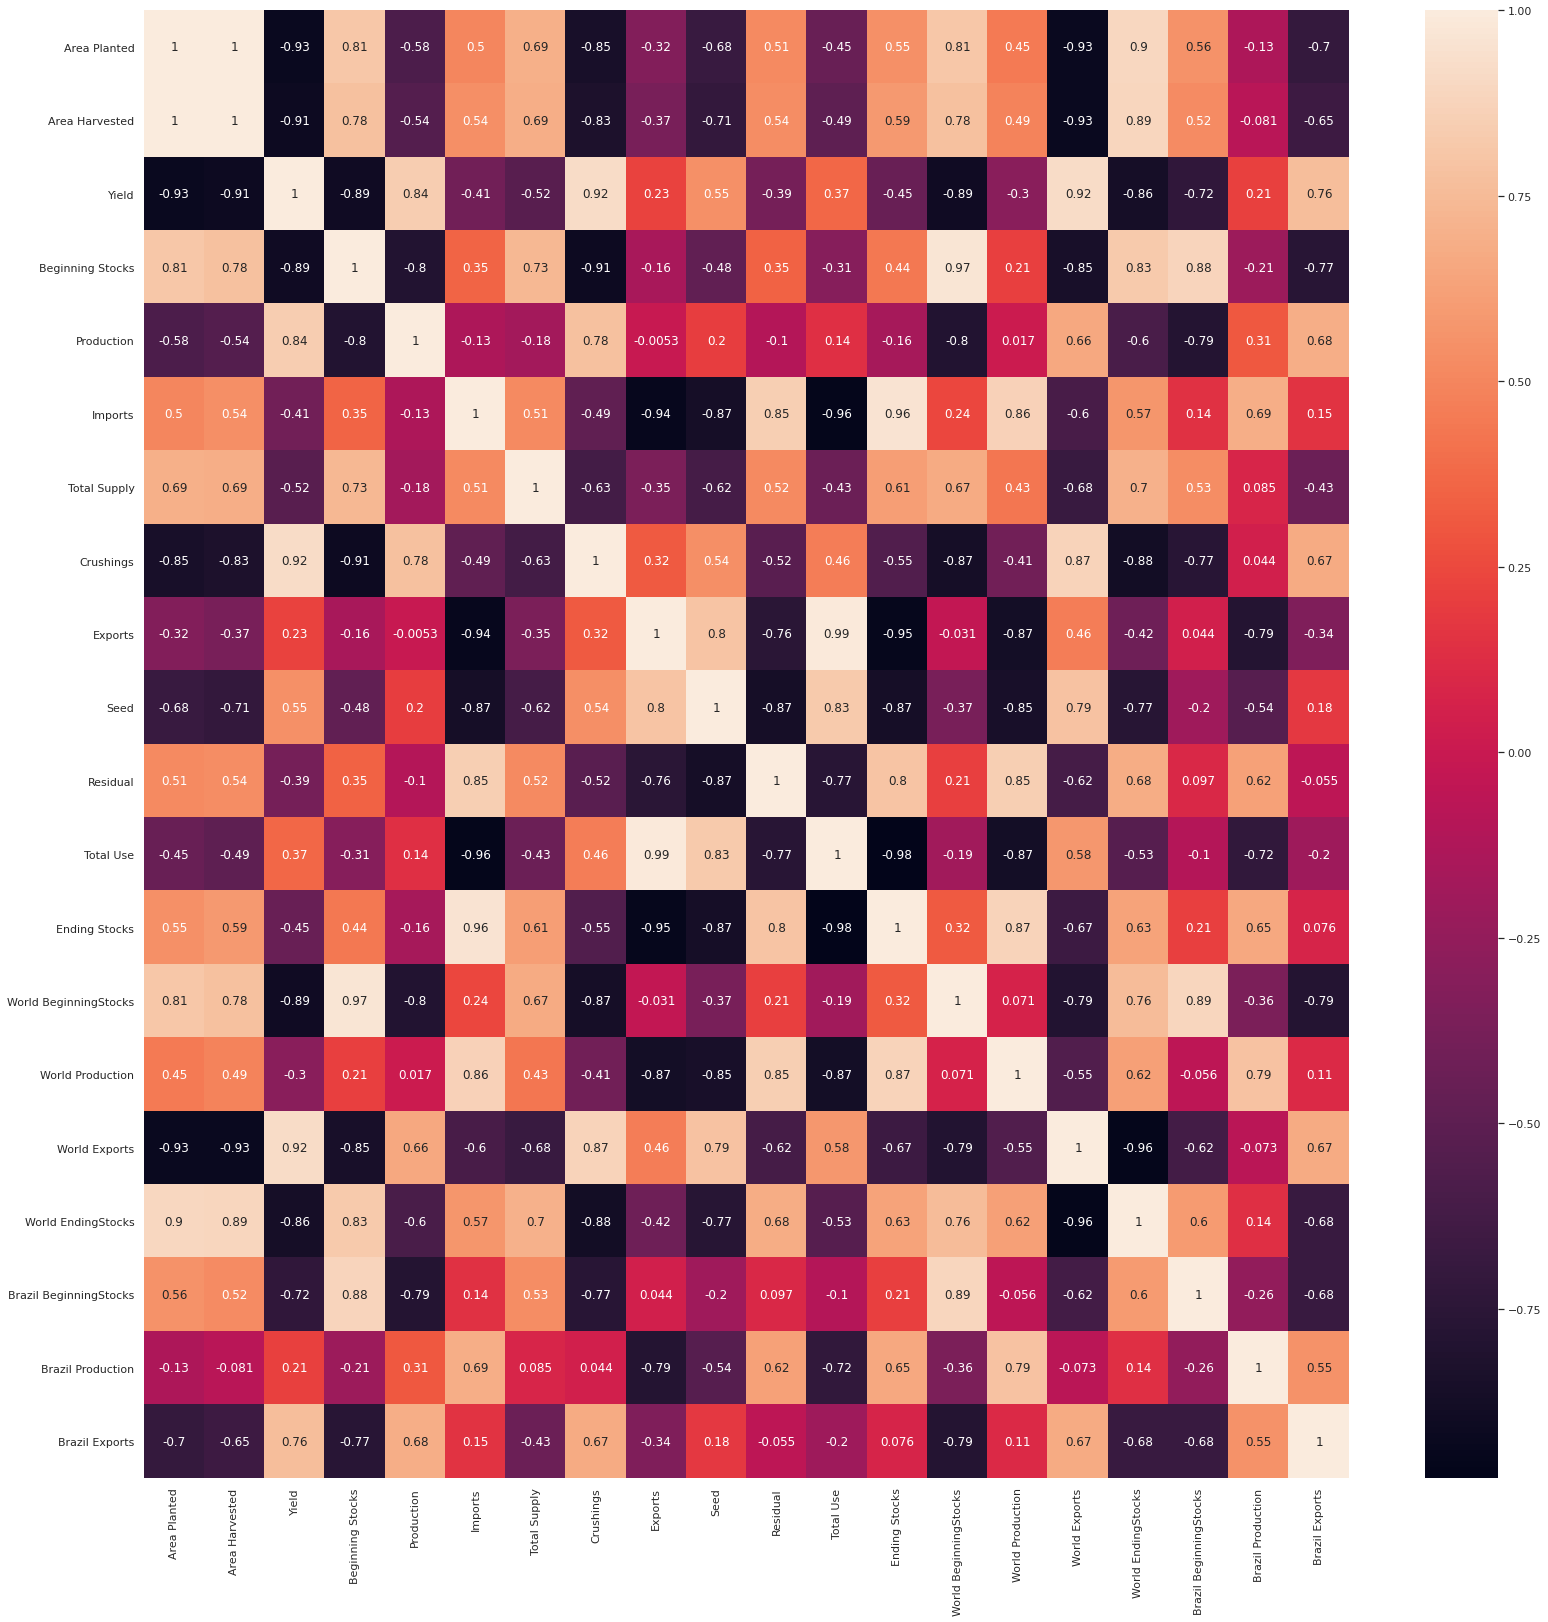

In [14]:
import seaborn as sns
plt.figure(figsize=(27,27))
sns.heatmap(ds.corr(), annot=True)

In [0]:
x = ds[['Brazil Production', 'Brazil Exports']]
y = ds["Date"]

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
#divide os dados


In [55]:
print("X_train shape: {}".format(x_train.shape)) #
print("y_train shape: {}".format(y_train.shape)) #
print("X_test shape: {}".format(x_test.shape)) #
print("y_test shape: {}".format(y_test.shape)) 
#saida do treino

X_train shape: (16, 2)
y_train shape: (16,)
X_test shape: (8, 2)
y_test shape: (8,)


In [0]:
rf_tree = RandomForestRegressor(n_estimators = 1500, verbose=1, criterion='mse')
#treino tipo Tree

In [57]:
rf_tree.fit(x_train, y_train)
pred_tree = rf_tree.predict(x_test)
print("Test set predictions: {}".format(pred_tree))
#prediz

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Test set predictions: [160006.444      159974.16733333 159974.16733333 159974.16733333
 156022.34639132 152321.21156681 158040.78544735 165685.68894661]


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    0.2s finished


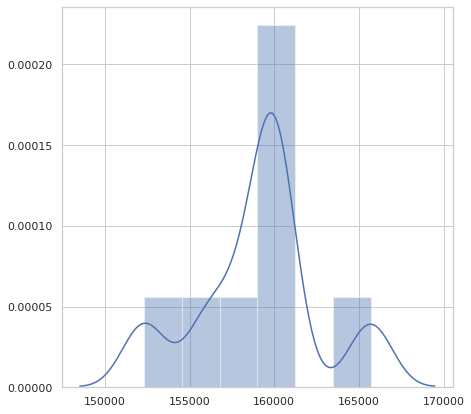

In [58]:
#grafico da Predição da arvore
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.distplot(pred_tree)

In [0]:
from sklearn.linear_model import LinearRegression

In [68]:
#Regressão 
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
regr_pred = regr.predict(x_test)
print("Test set predictions: {}".format(regr_pred))

Test set predictions: [156328.34720309 157147.52852359 157147.52852359 157147.52852359
 160396.37147648 153321.62370853 166726.40895307 161379.7067415 ]


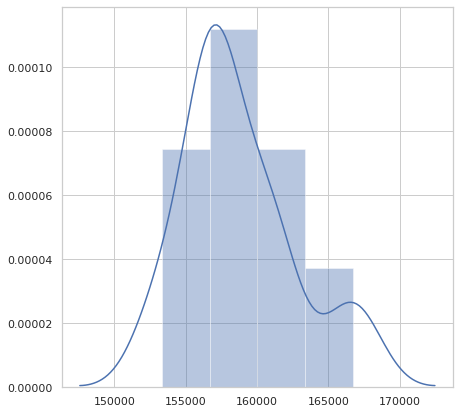

In [72]:
#grafico da Predição da Regreção 
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.distplot(regr_pred)